## Regression

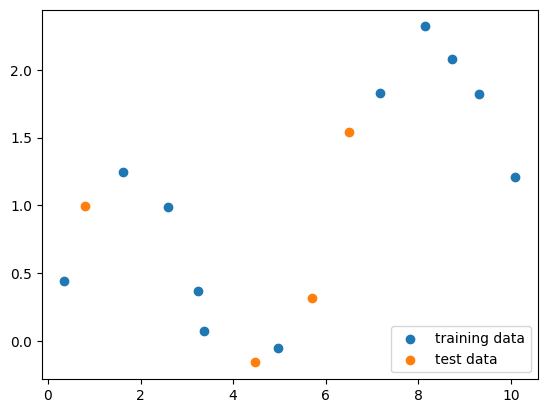

In [41]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 2, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def answer_one():
    degrees = [2,3,6,9]
    result =[]
    for i in degrees:
        result.append(polynomialPrediction(i))
    result=np.vstack(result)
    return result

def polynomialPrediction(deg):
    #Degree is determined by PolyFeeatures
    poly=PolynomialFeatures(degree=deg) 
    #To Trains both on x and x**2
    x_train_poly=poly.fit_transform(X_train.reshape(11,1))
    # importing Model and fitting its data
    reg = LinearRegression()
    reg.fit(x_train_poly,y_train)

    # creating data to test our Model
    x_predict= poly.fit_transform(np.linspace(0, 10, 100).reshape(100, 1))

    y_values_predict = reg.predict(x_predict)

    return y_values_predict

result=answer_one()
print(result)

[[ 5.38844184e-01  5.38465542e-01  5.38399013e-01  5.38644598e-01
   5.39202297e-01  5.40072109e-01  5.41254034e-01  5.42748073e-01
   5.44554226e-01  5.46672492e-01  5.49102871e-01  5.51845365e-01
   5.54899971e-01  5.58266691e-01  5.61945525e-01  5.65936473e-01
   5.70239533e-01  5.74854708e-01  5.79781996e-01  5.85021397e-01
   5.90572912e-01  5.96436541e-01  6.02612283e-01  6.09100138e-01
   6.15900107e-01  6.23012190e-01  6.30436386e-01  6.38172696e-01
   6.46221119e-01  6.54581656e-01  6.63254307e-01  6.72239070e-01
   6.81535948e-01  6.91144939e-01  7.01066043e-01  7.11299261e-01
   7.21844593e-01  7.32702038e-01  7.43871597e-01  7.55353269e-01
   7.67147055e-01  7.79252954e-01  7.91670967e-01  8.04401093e-01
   8.17443333e-01  8.30797686e-01  8.44464153e-01  8.58442734e-01
   8.72733428e-01  8.87336235e-01  9.02251156e-01  9.17478191e-01
   9.33017339e-01  9.48868601e-01  9.65031976e-01  9.81507465e-01
   9.98295067e-01  1.01539478e+00  1.03280661e+00  1.05053056e+00
   1.06856

### Fitted model plot

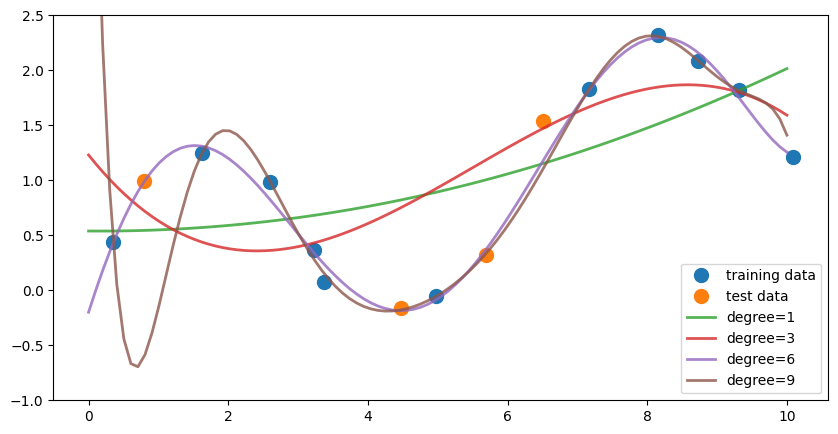

In [43]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
figure shows:
curves with degree 1 and 3 are underfitting as they didnt fit training data .
degree 6 is a good model because it gave us good accuracy in training and test
degree 9 represent overfitting as accuracy of training data is 100% and test data about 50%.

### Quick note on $R^2$-score:
A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 2 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

def answer_two():
    r2_train = []
    r2_test = []
    for i in range(2,10):
        r2_train.append(R2score(i)[0])
        r2_test.append(R2score(i)[1])
    return (r2_train,r2_test)

def R2score(deg):
    #Degree is determined by PolyFeeatures
    poly=PolynomialFeatures(degree=deg) 
    #To Trains both on x and x**2
    x_train_poly=poly.fit_transform(X_train.reshape(11,1))
    x_test_poly=poly.fit_transform(X_test.reshape(4,1))
    # importing Model and fitting its data
    reg = LinearRegression()
    reg.fit(x_train_poly,y_train)


    y_train_predict = reg.predict(x_train_poly)
    y_test_predict = reg.predict(x_test_poly)

    x_train_score=r2_score(y_train,y_train_predict)
    x_test_score=r2_score(y_test,y_test_predict)

    return x_train_score,x_test_score

result=answer_two()
result

([0.45109980444082465,
  0.5871995368779847,
  0.9194194471769308,
  0.9757864143068197,
  0.9901823324795076,
  0.9935250927840416,
  0.9963754538776017,
  0.9980370625665138],
 [-0.06856984149915912,
  0.005331052945740433,
  0.7300494281871145,
  0.8770830091614791,
  0.9214093981415032,
  0.9202150411139083,
  0.6324795282222628,
  -0.645253216177847])

### Question 3
Plot $R^2$ scores at degrees from 2 to 9.

Based on the $R^2$ scores (degree levels 2 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

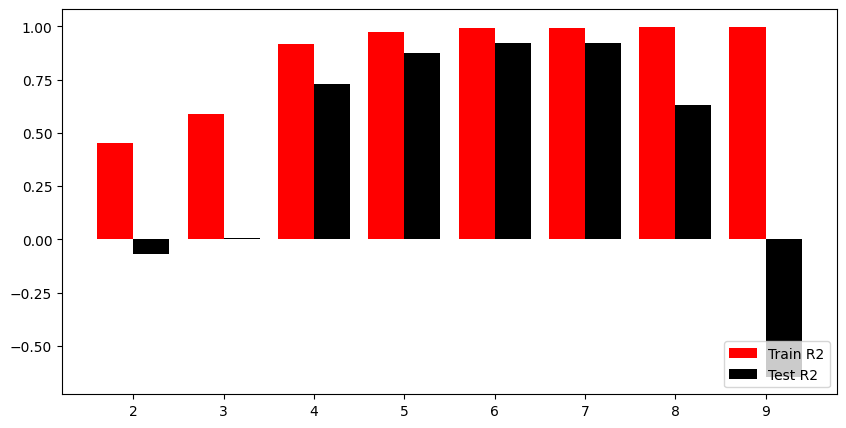

In [45]:
import matplotlib.pyplot as plt
def plot_two(result):
    plt.figure(figsize=(10,5))
    plt.bar(np.array(range(2,10)) - .2 , result[0] , width = .4, label='Train R2',color='red')
    plt.bar(np.array(range(2,10)) + .2, result[1]  , width = .4, label='Test R2', color= 'black')
    plt.legend(loc=4)

plot_two(result)

# the sec model is underfitting 
# Actually the best model of them is the 6th and 7th model
# Model 9 is overfitting 


### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results** model after being regularized have better R2 score

In [46]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    from sklearn.preprocessing import MinMaxScaler

    # first Model
    poly_Regression=PolynomialFeatures(degree=12) 
    x_train_poly=poly_Regression.fit_transform(X_train.reshape(11,1))
    x_test_poly=poly_Regression.fit_transform(X_test.reshape(4,1))
    reg = LinearRegression()
    reg.fit(x_train_poly,y_train)
    # Lasso Model
    #scaling lasso Parameters imporve weight selection
    scale = MinMaxScaler()
    x_train_poly = scale.fit_transform(x_train_poly)
    x_test_poly = scale.transform(x_test_poly)
    lass =Lasso(alpha=0.01,max_iter=10000).fit(x_train_poly,y_train)
    #prediction
    y_poly_predict=reg.predict(x_test_poly)
    y_lasso_predict=lass.predict(x_test_poly)
    #R2 Scores
    y_poly_predict_scores=r2_score(y_test, y_poly_predict)
    y_lasso_predict_scores=r2_score(y_test, y_lasso_predict)
    return (y_poly_predict_scores,y_lasso_predict_scores)
answer_four()

(-3.949516880647793, 0.011476661596737991)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [47]:
def mse(y_true, y_pred):
    length=len(y_true) 
    error = sum((y_true[i] - y_pred[i]) ** 2 for i in range(length)) / length
    return error

In [48]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import PolynomialFeatures

poly_Regression=PolynomialFeatures(degree=12) 
x_train_poly=poly_Regression.fit_transform(X_train.reshape(11,1))
x_test_poly=poly_Regression.fit_transform(X_test.reshape(4,1))
reg = LinearRegression()
reg.fit(x_train_poly,y_train)
y_poly_predict=reg.predict(x_test_poly)
myFunction=mse(y_test,y_poly_predict)
ImplementedFunction=MSE(y_test,y_poly_predict)
print(myFunction,ImplementedFunction)




2.2205795592878914 2.2205795592878914


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type 


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b 
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k 
        $$
    * Then for $b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)} 
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [49]:
import numpy as np
import random

# Linear Regression

class LinearRegression() :
    
    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :
        """
        This function initializes the object instance with arguments learning_rate, number of iterations, and whether to use linear or ridge or lasso
        reg_paramter is lambda for regularized regression"""

        self.learning_rate = learning_rate
        
        self.iterations = iterations
        
        self.type = type

        self.lam = reg_parameter
        
    def fit( self, X, Y ) :
        self.m, self.n = len(Y) , len(X)
        
        # weight initialization, initialize w to random numbers from a uniform distribution over [0,1(
        self.W = [random.uniform(0, 1) for i in range(self.m)]

        # intialize b to 0

        self.b = 0

        
        self.X = X

        
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self
    
    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients
        if self.type == 'linear':
            dW = (1/self.n) * np.dot(self.X, (Y_pred - self.Y))
            
            db = np.mean(Y_pred - self.Y)
            
        elif self.type == 'ridge':
            dW = (1/self.n) * np.dot(self.X, (Y_pred - self.Y)) + (2*self.alpha * self.W)

            db = np.mean(Y_pred - self.Y)
        else:
            dW = (1/self.n) * np.dot(self.X, (Y_pred - self.Y)) + self.alpha * np.sign(self.W)
            db =  np.mean(Y_pred - self.Y)

        # update weights
        self.W =self.W - self.alpha *dW
        
        self.b =self.b - self.alpha *db 

        # you don't need to return w and b
        return self

    def predict( self, X ) :
        if self.type == 'linear':
            y_pred = np.dot(X, self.W) + self.b
        elif self.type == 'ridge':
            y_pred = np.dot(X, self.W) + self.b
            
        else:
            y_pred = np.dot(X, self.W) + self.b
        return y_pred

### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [50]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

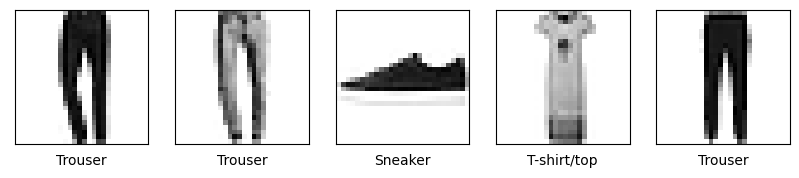

In [52]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [53]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1, random_state =0)

In [54]:
from sklearn.model_selection import cross_validate
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
    - a list with the scores obtained on the training samples for each classifier,
    - a list with the test scores obtained on the test samples for each classifier.
    The order of scores should match the order in which the classifiers were originally provided. E.g.:     
    [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    train_scores=[]
    test_scores=[]

    for i in classifiers:
        scores = cross_validate(i, X, y, cv=5,scoring=('accuracy'),return_train_score=True)
        train_score = scores['train_score']
        test_score = scores['test_score']
        # Append to lists
        train_scores.append(train_score)
        test_scores.append(test_score)

        
    return train_scores,test_scores


# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [55]:
classifiers = [LogisticRegression(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Print train scores and test scores.

In [56]:
print(train_scores)
print(test_scores)


[array([0.9125    , 0.92053571, 0.92089286, 0.92089286, 0.91767857]), array([0.86375   , 0.86571429, 0.86321429, 0.86267857, 0.86821429])]
[array([0.835     , 0.80071429, 0.82      , 0.81428571, 0.81214286]), array([0.79428571, 0.82285714, 0.79857143, 0.81285714, 0.79928571])]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [57]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]  # create a list of dictionaries

grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf, grid in zip(classifiers, grids)]


C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
print(grid_searches)

[GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-12, 1.38949549e-11, 1.93069773e-10, 2.68269580e-09,
       3.72759372e-08, 5.17947468e-07, 7.19685673e-06, 1.00000000e-04,
       1.38949549e-03, 1.93069773e-02, 2.68269580e-01, 3.72759372e+00,
       5.17947468e+01, 7.19685673e+02, 1.00000000e+04, 1.38949549e+05,
       1.93069773e+06, 2.68269580e+07, 3.72759372e+08, 5.17947468e+09,
       7.19685673e+10, 1.00000000e+12])},
             return_train_score=True), GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  6,  9, 13, 19, 28, 41, 60])},
             return_train_score=True)]


In [59]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

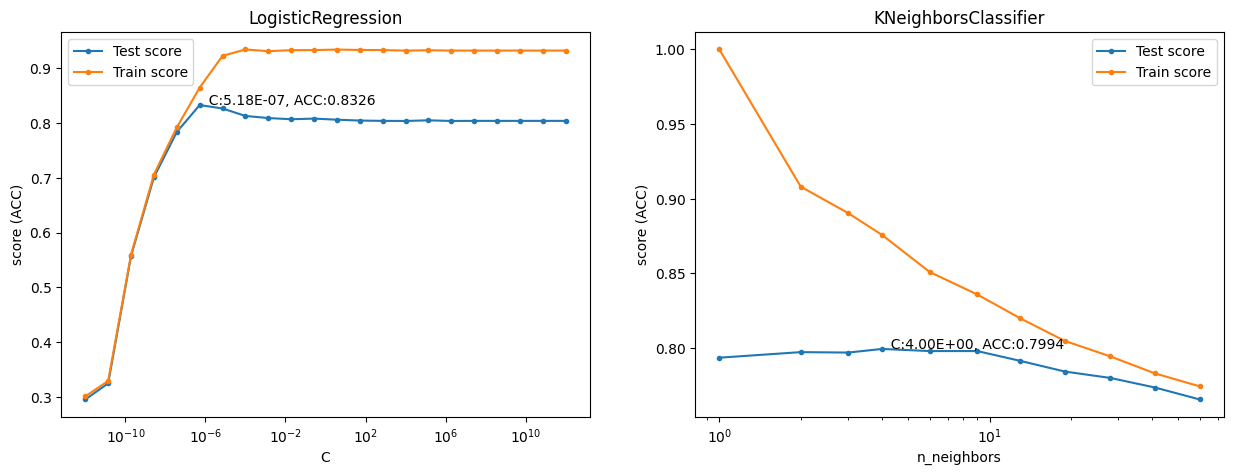

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches, ['C', 'n_neighbors'], axes):
    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

1) For the Logistic Regression :
- The Model is under fitting in from 10^-12 to approximatly 10^-8 where the accuracy is considered low
- The Model is over  fitting in the reigon after 10^-6 as the training score strats to rapidly increase while test score starts to decay a bit which means thatdata is not      representinve .
- The model is senstive in some parts from 10^-10 to 10^-6 to the values of c
2) For the n_neighbors Model:
- The Model is under fitting 10^0 to almost part before 10^1 where the two curves starts to converge and training curve decreases
- The Model is not overfitting as the values of scores of train and test are not hugly varaying but both decreasing
- The model is senstive in this curve as the scores changes rapidly by a small change in the n_neighbor value

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [61]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [62]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


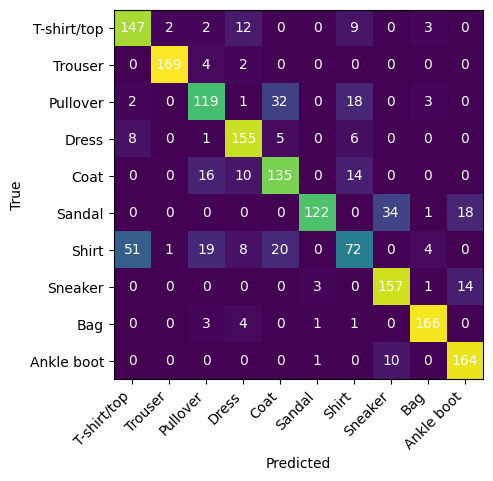

In [64]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

In [65]:
try:
    tn, fp, fn, tp = cm.ravel()
except ValueError:
    tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)

print("Accuracy:", accuracy)
print("precision:",precision)

Accuracy: 0.9937106918238994
precision: 0.9883040935672515


The Confusion matrix which is drawn using heat map here represents the predicted values by the model versues the Predicited values:
there are alot of methods inorder to be able to judge or inother words interpret the values of the confusion matrix
- the Acurracy = (True postive + True negative) / (true postive + false postive + false negative + true negative )
- the precision = (True postive)/(true postive + false postive)

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [66]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

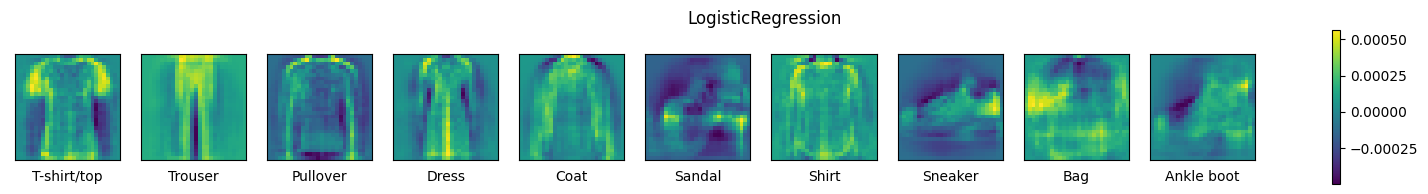

In [67]:
plot_coefficients(model)

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**
1) We get multiple plots per model because we are using different combinations of hyperparameters (C) in the grid search for each model. Each combination of hyperparameters produces a different trained model, which is evaluated using cross-validation.
2) The model coefficients are the weights assigned to each feature which are the pixels is 28x28 784 pixel corresponding to 784 features each of the features takes a specific  weight which either makes the pixel very dark and very light which significally define the pictures from each other
3) The model pay attention to the most important fetures which are the item in the picture itself and ignores/add less weights to the background of the image
4) There do seem to be differences in quality between the different classes its obvious due to the variation in accuracy scores achieved by the different models. For example the logistic regression model achieved higher accuracy on certain classes

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. 

In the cell below replace the ####### with your trained models with different alphas.

C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

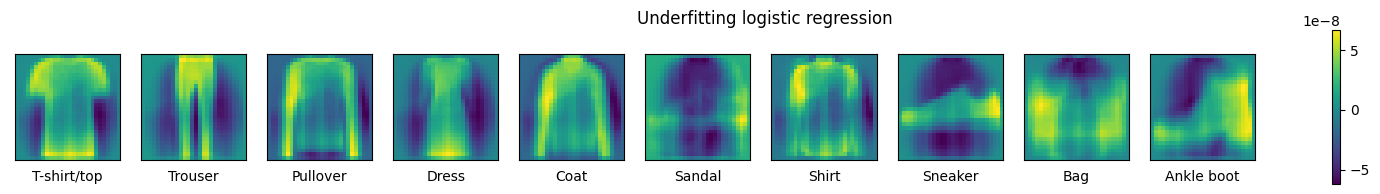

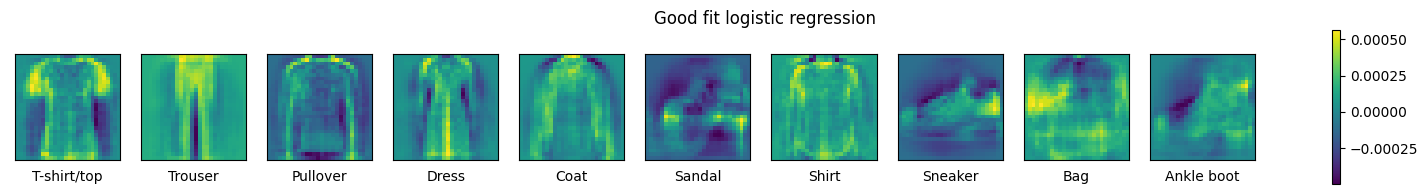

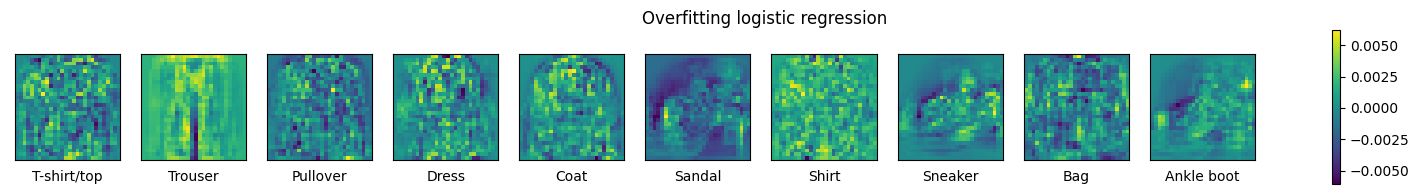

In [68]:
underfitMdel = LogisticRegression(C=1e-12).fit(X_train,y_train)
y_pred_underfitmodel = model.predict(X_test)
goodfitModel = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred_underfitmodel = model.predict(X_test)
overfitModel = LogisticRegression(C=1e10).fit(X_train,y_train)
y_pred_underfitmodel = model.predict(X_test)

plot_coefficients(underfitMdel,"Underfitting logistic regression")
plot_coefficients(goodfitModel,"Good fit logistic regression")
plot_coefficients(overfitModel,"Overfitting logistic regression")

Interpret and explain the results.
* **Answer:**
in the underfit case the pictures are smooth and not clear due to very low accuracy, in the overfit face the pictures are pixeles and not clear as well and finally in the good model the pictures are clear and features could be extracted due to the high resolution in picture color gradient.

In the case of the underfitting model, the regularization parameter (C) is very small (1e-12), which means that the model is heavily penalized and restricted in its ability to fit the training data. As a result, the coefficients of the model are also limited in their magnitude and variability, resulting in a smoother and less informative plot.

In the case of the overfitting model, the regularization parameter (C) is very large (1e10), which means that the model is allowed to fit the training data very closely and potentially overfit to noise in the data. This can result in coefficients that are highly variable and sensitive to small changes in the data, leading to a more pixelated and unclear plot.

In the case of the good fitting model, the regularization parameter (C) is set at an intermediate level (1e-7), allowing the model to balance between fitting the data well and avoiding overfitting. As a result, the coefficients are clear and informative, allowing for the extraction of meaningful features from the data.